In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the dataset
X = pd.read_csv('../Datasets/NB.csv')
X['Fault'] = 0

y = pd.read_csv('../Datasets/OR - 21.csv')
y['Fault'] = 1

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, shuffle=False, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, shuffle=False, random_state = 0)

In [4]:
train = X_train.append(y_train)
train = train.reset_index(drop=True)
train

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
193843,0.166496,0.076429,1
193844,0.164872,0.194360,1
193845,0.079593,0.064718,1
193846,0.031675,-0.018080,1


In [5]:
test = X_test.append(y_test)
test = test.reset_index(drop=True)
test

,DE,FE,Fault
0,0.058204,-0.015204,0
1,0.011057,0.005958,0
2,-0.066548,0.066362,0
3,-0.131845,0.110535,0
4,-0.132471,0.096153,0
...,...,...,...
48457,-0.132385,0.046844,1
48458,-0.060507,0.001027,1
48459,0.139694,0.126149,1
48460,0.086091,0.049104,1


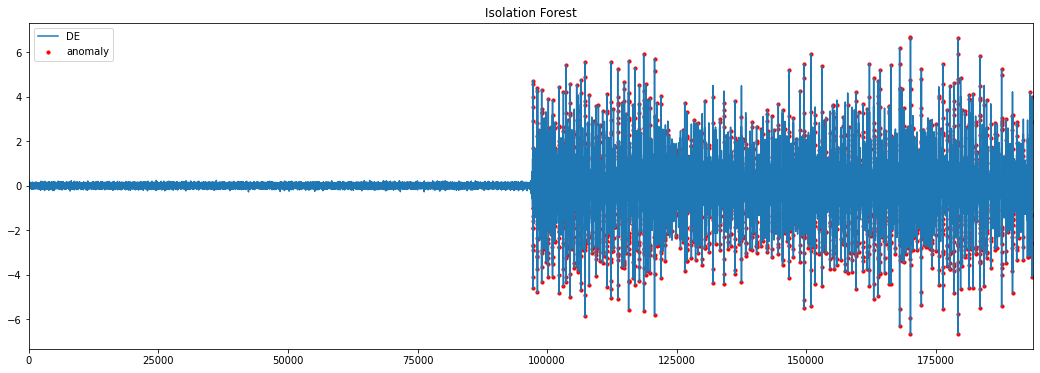

In [6]:
from sklearn.ensemble import IsolationForest

train_data = train[['DE', 'FE', 'Fault']]
scaler = MinMaxScaler()
np_scaled = scaler.fit_transform(train_data)
train_data = pd.DataFrame(np_scaled)
outliers_fraction = 0.01

# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(train_data) 
train['anomaly'] = pd.Series(model.predict(train_data))

# visualization
train_anomalies = train[train['anomaly'] == -1]

f, (ax1) = plt.subplots(figsize=(18, 6))
ax1.scatter(train_anomalies.index, train_anomalies.DE, label='anomaly', color='red', s=10)
ax1.plot(train.index, train.DE, label='DE');
plt.xlim((0,len(train.index)))

plt.title('Isolation Forest')
plt.legend();
plt.show();

In [7]:
train_anomalies

,DE,FE,Fault,anomaly
97308,-2.717134,-0.173609,1,-1
97312,-1.898054,0.398582,1,-1
97316,3.531340,-0.446453,1,-1
97317,-1.352272,0.701011,1,-1
97318,-2.642007,-0.217371,1,-1
...,...,...,...,...
193548,3.979255,0.470491,1,-1
193550,-4.089304,-0.497611,1,-1
193552,2.871853,0.287020,1,-1
193553,-2.557541,-0.251887,1,-1


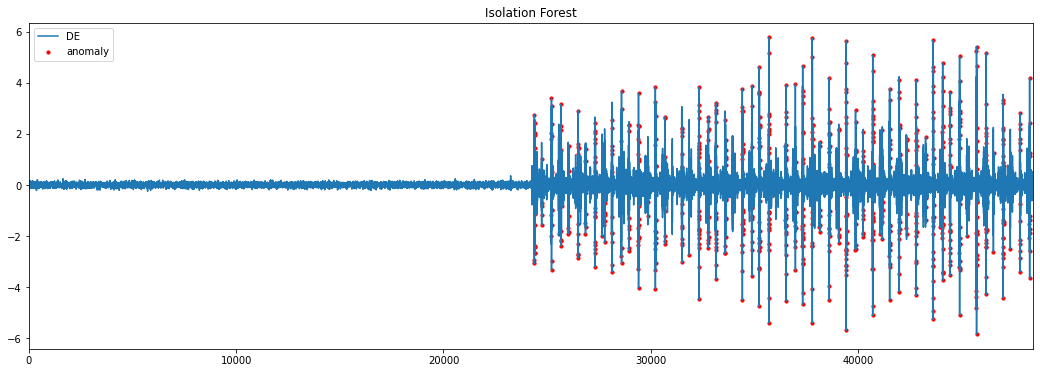

In [8]:
test_data = test[['DE', 'FE', 'Fault']]
scaler = MinMaxScaler()
np_scaled = scaler.fit_transform(test_data)
test_data = pd.DataFrame(np_scaled)

test['anomaly'] = pd.Series(model.predict(test_data))

# visualization
test_anomalies = test[test['anomaly'] == -1]

f, (ax1) = plt.subplots(figsize=(18, 6))
ax1.scatter(test_anomalies.index, test_anomalies.DE, label='anomaly', color='red', s=10)
ax1.plot(test.index, test.DE, label='DE');
plt.xlim((0,len(test.index)))

plt.title('Isolation Forest')
plt.legend();
plt.show();

In [9]:
test_anomalies

,DE,FE,Fault,anomaly
24385,-3.063933,-0.048487,1,-1
24387,2.754494,-0.042324,1,-1
24389,-2.935609,0.327495,1,-1
24394,1.465165,0.676973,1,-1
24399,-2.683834,-0.507473,1,-1
...,...,...,...,...
48297,-1.213390,-0.783398,1,-1
48304,-1.356739,-1.163489,1,-1
48306,1.253187,-0.428578,1,-1
48310,0.457661,1.467767,1,-1


In [10]:
from sklearn.metrics import accuracy_score
score = 100 * accuracy_score(test['anomaly'], test['Fault'])
print("Accuracy: {:.2f}%".format(score))

Accuracy: 48.31%


In [11]:
print("Anomalies: {}".format(test_anomalies['anomaly'].count()))

Anomalies: 819
